In [1]:
import pandas as pd
import pandasql as ps

import matplotlib.pyplot as plt

In [2]:

log_100_0 = './n-100-workload0.txt'
log_100_2 = './n-100-2.txt'
log_100_3 = './n-100-3.txt'
log_100_4 = './n-100-4.txt'
log_100_5 = './n-100-5.txt'

log_5_0 = './n-5-workload1.txt'
log_5_2 = './n-5-2.txt'
log_5_3 = './n-5-3.txt'
log_5_4 = './n-5-4.txt'

log_50_0 = './n-50-0.txt'

In [15]:

def skip_n_lines_in_file(opened_file, n):
    for _ in range(n):
        opened_file.readline()

def strip_and_split_line_by_spaces(line):
    return [i for i in line.strip().split(' ') if i]

def parse_log_file_to_data_frame(log_file):
    with open(log_file, 'r') as f:
        n = 0
        header_length = 5
        skip_n_lines_in_file(f, header_length)
        df = pd.DataFrame()
        header = ['time'] + strip_and_split_line_by_spaces(f.readline())[1:-1]
        #print(len(header), header)
        data = []
        for line in f.readlines():
            linetab = strip_and_split_line_by_spaces(line)
            linetab = linetab[:-2]
            data.append(linetab)
        return pd.DataFrame.from_records(data, columns=header)

def parse_and_show_graph(filename, low=None, up=None):
    parsed = parse_log_file_to_data_frame(filename)

    incoming = ps.sqldf('select sum("iKbyte/s") from parsed group by time').values
    up = up if not None else len(incoming)
    low = low if not None else 0
    incoming = incoming[low:up]
    plt.plot(incoming)
    plt.show()
    avg = sum(incoming)/len(incoming)
    print(avg)
    return float(avg)

def average_of_list(l):
    return sum(l)/len(l)

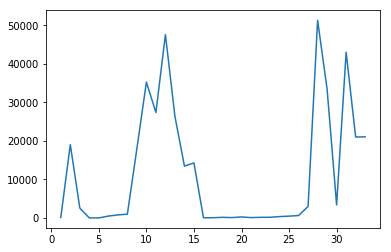

In [69]:
parsed = parse_log_file_to_data_frame('./n-100-6.txt')
incoming = ps.sqldf('select sum("iKbyte/s") from parsed group by time').values
plt.plot(incoming)

In [16]:
parsed_100 = parse_log_file_to_data_frame(log_100_0)
parsed_100.head()

,time,interf,busy,ipack/s,opack/s,iKbyte/s,oKbyte/s,imbps,ombps
0,11:45:50,r0-nic,0%,0.0,0.0,0,0,0,0
1,11:45:50,47b993,0%,0.0,0.0,0,0,0,0
2,11:45:50,eno1,0%,14.0,7.0,2,2,0,0
3,11:45:50,288e5d,?,0.0,0.0,0,0,0,None
4,11:45:50,lo,?,0.0,0.0,0,0,0,None


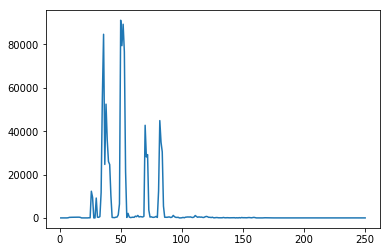

In [43]:
parsed_100 = parse_log_file_to_data_frame(log_100_0)
incoming = ps.sqldf('select sum("iKbyte/s") from parsed_100 group by time ').values
plt.plot(incoming)

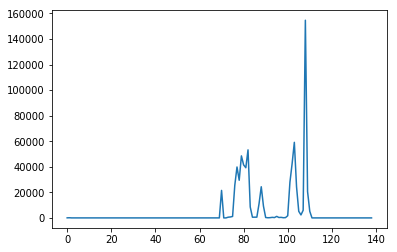

[5110.27338129]


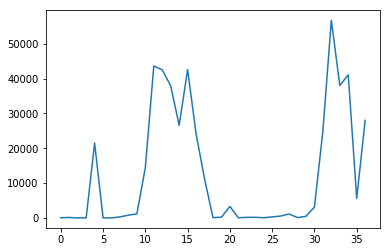

[12742.35135135]


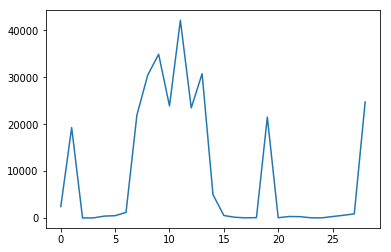

[9854.27586207]


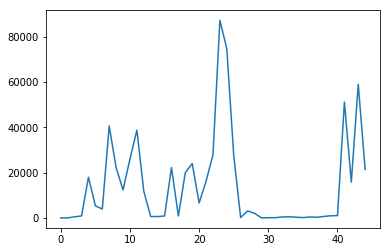

[14397.22222222]


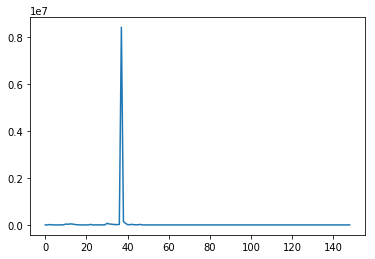

[61563.7852349]


In [54]:
avg_100 = [
    parse_and_show_graph('./n-100-0.txt', 1, 150),
    parse_and_show_graph('./n-100-1.txt', 1, 150),
    parse_and_show_graph('./n-100-2.txt', 1, 150),
    parse_and_show_graph('./n-100-3.txt', 5, 150),
    parse_and_show_graph('./n-100-5.txt', 1, 150),

]

In [45]:
print(average_of_list(avg_100))

10526.030704234377


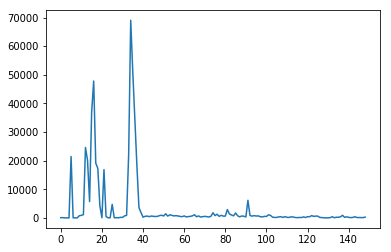

[3290.85234899]


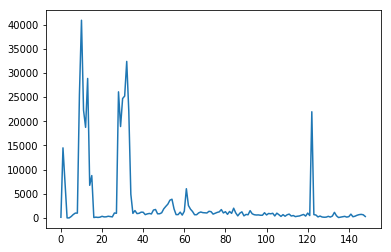

[3115.00671141]


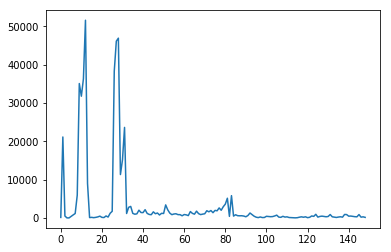

[3284.17449664]


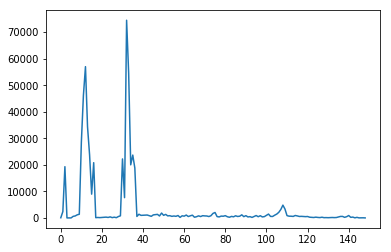

[3705.22147651]


In [46]:
avg_50 = [
    parse_and_show_graph('./n-50-0.txt', 1, 150),
    parse_and_show_graph('./n-50-1.txt', 1, 150),
    parse_and_show_graph('./n-50-2.txt', 1, 150),
    parse_and_show_graph('./n-50-3.txt', 1, 150),

]

In [47]:
print(average_of_list(avg_50))

3348.8137583892617


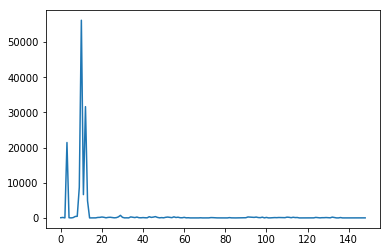

[955.5704698]


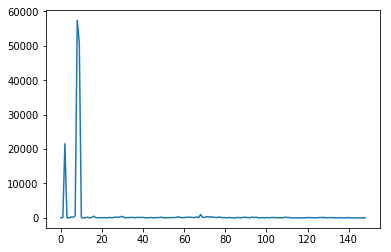

[980.08724832]


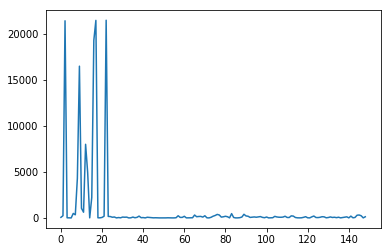

[900.09395973]


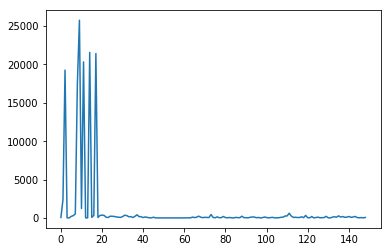

[964.93288591]


In [48]:
avg_5 = [
    parse_and_show_graph('./n-5-0.txt', 1, 150),
    parse_and_show_graph('./n-5-1.txt', 1, 150),
    parse_and_show_graph('./n-5-2.txt', 1, 150),
    parse_and_show_graph('./n-5-3.txt', 1, 150),
]

In [49]:
# graph bandwidth per number of actors


xs = [5, 50, 100]
ys = [average_of_list(avg_5), average_of_list(avg_50), average_of_list(avg_100)]
print(ys)

[950.1711409395973, 3348.8137583892617, 10526.030704234377]


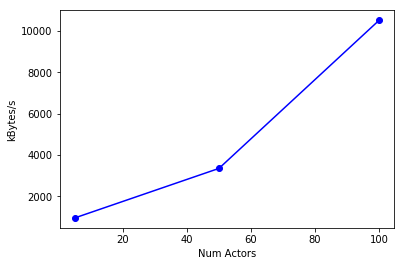

In [50]:
plt.xlabel('Num Actors')
plt.ylabel('kBytes/s')
plt.plot(xs, ys, 'bo-')
plt.savefig('num-actors-vs-bytes')

In [74]:
import statistics
import math
import numpy as np
print(avg_5)
print(math.sqrt(statistics.variance(avg_5)))
print(math.sqrt(statistics.variance(avg_50)))
print(math.sqrt(statistics.variance(avg_100)))


[955.5704697986578, 980.0872483221476, 900.0939597315436, 964.9328859060403]
34.87959969787076
251.15065590970593
23095.24730845424


In [33]:
avg_100

[5110.273381294964, 12742.351351351352, 9854.275862068966, 14397.222222222223]

In [34]:
np.var(avg_100)

12419970.732180651